In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import requests
import spacy
from nltk import tokenize
import numpy as np
import string
import spacy
import seaborn as sns
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
import requests
from bs4 import BeautifulSoup
  
HEADERS = ({'User-Agent':
            'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
            AppleWebKit/537.36 (KHTML, like Gecko) \
            Chrome/90.0.4430.212 Safari/537.36',
            'Accept-Language': 'en-US, en;q=0.5'})
  
def getdata(url):
    r = requests.get(url, headers=HEADERS)
    return r.text
  
def html_code(url):
    htmldata = getdata(url)
    soup = BeautifulSoup(htmldata, 'html.parser')
    return (soup)


In [3]:
def cus_rev(soup):
    data_str = "" 
    for item in soup.find_all("div", class_="a-row a-spacing-small review-data"):
        data_str = data_str + item.get_text() 
    result = data_str.split("\n")
    return (result)

In [8]:
l=range(1000)

### Product used is CCrocs Unisex-Adult Classic Clogs (Best Sellers) from amazon

### it can be found in the url https://www.amazon.com/Crocs-Unisex-Classic-Clog-Black/dp/B08CV9WKRH/ref=cm_cr_arp_d_pdt_img_top?ie=UTF8

### Web scraping to get reviews of the product for first 1000 pages

In [9]:
rev_result = []
url = "https://www.amazon.com/Crocs-Unisex-Classic-Clog-Black/product-reviews/B08CV9WKRH/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
for i in l:    
    soup = html_code(url)
    rev_data = cus_rev(soup)
    for i in rev_data:
        if i == "":
            pass
        else:
            rev_result.append(i)
    a=soup.find("li", class_="a-last")
    b=a.decode().split('<')
    c=b[2].split(r'"')
    url="https://www.amazon.com/"+c[1]
    
    

In [10]:
len(rev_result)

10000

In [11]:
rev_result

["These are my first pair of Crocs and it was love at first try-on! I bought the basic Classic ones which I read are supposed to fit pretty loosly. The toe box is perfect for my wide feet and allows my toes to spread. There is just the right amount of space in front of my toes. The instep is maybe tighter than I read it is supposed to fit. I have a high instep and what is called a full foot. The shoe is not tight but there is contact with my foot all across the area between the holes on top and the foot opening. It's not uncomfortable or tight at all but I read the fit is supposed to be such that your foot does not touch the shoe here. I also wonder if they would cause blisters. From what I read there is supposed to be space here between your foot and the shoe. If I wore socks they would need to be thin ones.Second thing is when I received them I tipped them out of the bag onto my hard floor. (I am still cautious about packaging due to Covid concerns so this is just the way I do things

### Stripping the reviews of spaces before and after the text.

In [13]:
reviews=[x.strip() for x in rev_result]

In [14]:
reviews

["These are my first pair of Crocs and it was love at first try-on! I bought the basic Classic ones which I read are supposed to fit pretty loosly. The toe box is perfect for my wide feet and allows my toes to spread. There is just the right amount of space in front of my toes. The instep is maybe tighter than I read it is supposed to fit. I have a high instep and what is called a full foot. The shoe is not tight but there is contact with my foot all across the area between the holes on top and the foot opening. It's not uncomfortable or tight at all but I read the fit is supposed to be such that your foot does not touch the shoe here. I also wonder if they would cause blisters. From what I read there is supposed to be space here between your foot and the shoe. If I wore socks they would need to be thin ones.Second thing is when I received them I tipped them out of the bag onto my hard floor. (I am still cautious about packaging due to Covid concerns so this is just the way I do things

### Getting sentences

In [15]:
sentences = tokenize.sent_tokenize(" ".join(reviews))
sentences[0:10]

['These are my first pair of Crocs and it was love at first try-on!',
 'I bought the basic Classic ones which I read are supposed to fit pretty loosly.',
 'The toe box is perfect for my wide feet and allows my toes to spread.',
 'There is just the right amount of space in front of my toes.',
 'The instep is maybe tighter than I read it is supposed to fit.',
 'I have a high instep and what is called a full foot.',
 'The shoe is not tight but there is contact with my foot all across the area between the holes on top and the foot opening.',
 "It's not uncomfortable or tight at all but I read the fit is supposed to be such that your foot does not touch the shoe here.",
 'I also wonder if they would cause blisters.',
 'From what I read there is supposed to be space here between your foot and the shoe.']

### Making the data into a dataframe

In [16]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,These are my first pair of Crocs and it was lo...
1,I bought the basic Classic ones which I read a...
2,The toe box is perfect for my wide feet and al...
3,There is just the right amount of space in fro...
4,The instep is maybe tighter than I read it is ...
...,...
108995,They are super comfy and fit well.
108996,They are also very light feeling.
108997,"When I first wore them and lifted my feet, it ..."
108998,"I am a size 8.5 and got a 9, which fit fine, b..."


### Getting the negative words affinity values
### Putting affinity to be -1 for all the words

In [17]:
afinn_n = pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\text mining\\negative-words.txt",sep=';', encoding='latin-1')
afinn_n=afinn_n.iloc[:,0]
afinn_n.dropna(inplace=True)
afinn_n=afinn_n.reset_index()
afinn_n['value']=-1
afinn_n.drop(['index'],axis=1,inplace=True)
afinn_n.columns=['words','value']
afinn_n

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
4778,zaps,-1
4779,zealot,-1
4780,zealous,-1
4781,zealously,-1


### Getting the positive words affinity values
### Putting affinity to be -1 for all the words

In [18]:
afinn_p = pd.read_csv("C:\\Users\\Govind S\\Downloads\\ds\\ds files\\assignments\\text mining\\positive-words.txt",sep=';', encoding='latin-1')
afinn_p=afinn_p.iloc[:,0]
afinn_p.dropna(inplace=True)
afinn_p=afinn_p.reset_index()
afinn_p['value']=1
afinn_p.drop(['index'],axis=1,inplace=True)
afinn_p.columns=['words','value']
afinn_p

,words,value
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1
...,...,...
2001,youthful,1
2002,zeal,1
2003,zenith,1
2004,zest,1


### Concatinating the dataframes to get an affinity dataframe

In [19]:
afinn=pd.concat([afinn_n,afinn_p],ignore_index=True)
afinn

,words,value
0,2-faced,-1
1,2-faces,-1
2,abnormal,-1
3,abolish,-1
4,abominable,-1
...,...,...
6784,youthful,1
6785,zeal,1
6786,zenith,1
6787,zest,1


In [20]:
affinity_scores = afinn.set_index('words')['value'].to_dict()

In [21]:
affinity_scores

{'2-faced': -1,
 '2-faces': -1,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -1,
 'accuses': -1,
 'accusing': -1,
 'accusingly': -1,
 'acerbate': -1,
 'acerbic': -1,
 'acerbically': -1,
 'ache': -1,
 'ached': -1,
 'aches': -1,
 'achey': -1,
 'aching': -1,
 'acrid': -1,
 'acridly': -1,
 'acridness': -1,
 'acrimonious': -1,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1

### Defining a function to calculate sentiment

In [22]:
nlp = spacy.load('en_core_web_md')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

### Calculating sentiment

In [23]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [24]:
sent_df

,sentence,sentiment_value
0,These are my first pair of Crocs and it was lo...,1
1,I bought the basic Classic ones which I read a...,2
2,The toe box is perfect for my wide feet and al...,1
3,There is just the right amount of space in fro...,1
4,The instep is maybe tighter than I read it is ...,0
...,...,...
108995,They are super comfy and fit well.,3
108996,They are also very light feeling.,0
108997,"When I first wore them and lifted my feet, it ...",1
108998,"I am a size 8.5 and got a 9, which fit fine, b...",3


### Data with sentiment value greater than 5

In [26]:
sent_df[sent_df.sentiment_value>5]

,sentence,sentiment_value
71,"If I ever find size 7 for a good price, I will...",6
180,"If I ever find size 7 for a good price, I will...",6
289,"If I ever find size 7 for a good price, I will...",6
398,"If I ever find size 7 for a good price, I will...",6
507,"If I ever find size 7 for a good price, I will...",6
...,...,...
108526,"If I ever find size 7 for a good price, I will...",6
108635,"If I ever find size 7 for a good price, I will...",6
108744,"If I ever find size 7 for a good price, I will...",6
108853,"If I ever find size 7 for a good price, I will...",6


### Data with sentiment value less than 0

In [34]:
sent_df[sent_df.sentiment_value<0]

,sentence,sentiment_value
7,It's not uncomfortable or tight at all but I r...,-1
10,If I wore socks they would need to be thin one...,-1
11,(I am still cautious about packaging due to Co...,-1
14,Can anyone tell me what is used to dust new sh...,-1
17,I was a self-professed Crocs hater.,-1
...,...,...
108974,"It is a waste of my time, energy, and petrol.",-1
108980,I think it is entirely possible that this pair...,-1
108990,Now all I has't is crocs to holp cope ...,-1
108993,":) I was always hesitant to try Crocs, mainly ...",-1


### Finding the word count of sentences

In [35]:
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df.head(10)

,sentence,sentiment_value,word_count
0,These are my first pair of Crocs and it was lo...,1,14
1,I bought the basic Classic ones which I read a...,2,15
2,The toe box is perfect for my wide feet and al...,1,15
3,There is just the right amount of space in fro...,1,13
4,The instep is maybe tighter than I read it is ...,0,13
5,I have a high instep and what is called a full...,0,12
6,The shoe is not tight but there is contact wit...,1,25
7,It's not uncomfortable or tight at all but I r...,-1,26
8,I also wonder if they would cause blisters.,0,8
9,From what I read there is supposed to be space...,0,17


In [36]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
61002,"If I ever find size 7 for a good price, I will...",6,48
68959,"If I ever find size 7 for a good price, I will...",6,48
57187,"If I ever find size 7 for a good price, I will...",6,48
42363,"If I ever find size 7 for a good price, I will...",6,48
101223,"If I ever find size 7 for a good price, I will...",6,48
6611,"If I ever find size 7 for a good price, I will...",6,48
104384,"If I ever find size 7 for a good price, I will...",6,48
7919,"If I ever find size 7 for a good price, I will...",6,48
10208,"If I ever find size 7 for a good price, I will...",6,48
42799,"If I ever find size 7 for a good price, I will...",6,48


In [37]:
sent_df['sentiment_value'].describe()

count    109000.000000
mean          0.596330
std           1.264331
min          -1.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           6.000000
Name: sentiment_value, dtype: float64

### Plotting the sentiment value for first 1000 data

<AxesSubplot:ylabel='sentiment_value'>

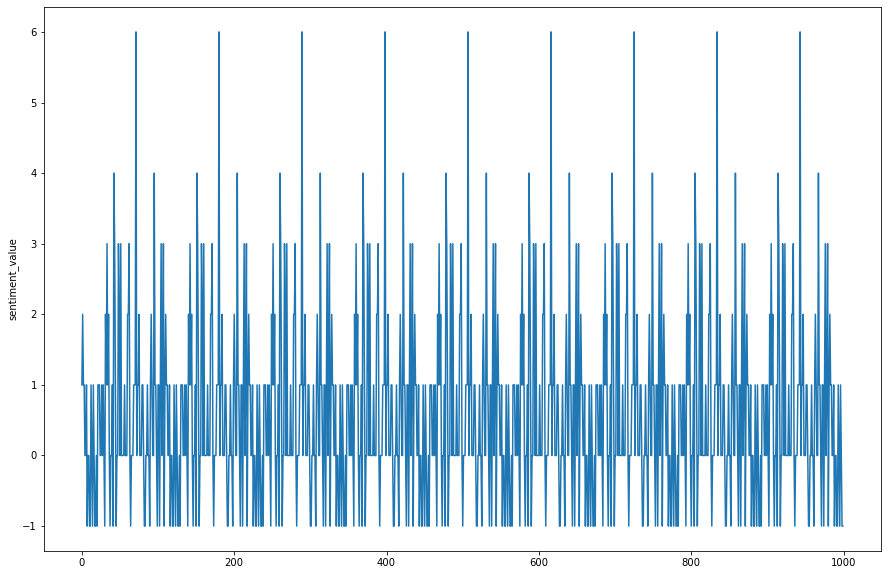

In [44]:
plt.figure(figsize=(15, 10))
sns.lineplot(y=sent_df['sentiment_value'].head(1000),x=range(1000))

### Plotting the scatterplot of sentiment value vs word_count

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

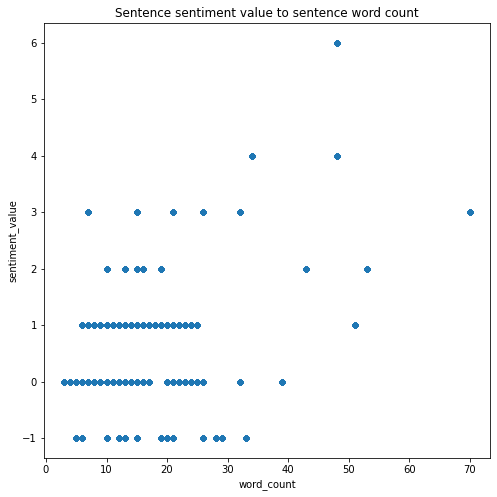

In [45]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), 
                     title='Sentence sentiment value to sentence word count')

In [1]:
pip install BeautifulSoup

  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Using cached BeautifulSoup-3.2.1.tar.gz (31 kB)
  Using cached BeautifulSoup-3.2.0.tar.gz (31 kB)
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Govind S\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Govind S\\AppData\\Local\\Temp\\pip-install-f8d_aqh8\\beautifulsoup_6aa612c1270b4422a502fa35a2b62718\\setup.py'"'"'; __file__='"'"'C:\\Users\\Govind S\\AppData\\Local\\Temp\\pip-install-f8d_aqh8\\beautifulsoup_6aa612c1270b4422a502fa35a2b62718\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Govind S\AppData\Local\Temp\pip-pip-egg-info-ejtrjipn'
         cwd: C:\Users\Govind S\AppData\Local\Temp\pip-install-f8d_aqh8\beautifulsoup_6aa612c1270b4422a502fa35a2b62718\
    Complete output (6 lines):
    Traceback (most recent call last):
      File "<string>", lin

In [9]:
a=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])

([<matplotlib.patches.Wedge at 0x24e42fe32e0>,
 [Text(1.087229608003385, 0.16712803319852174, ''),
  Text(0.9828289461480074, 0.4940113992749534, ''),
  Text(0.7770213716923852, 0.7786127329637529, ''),
  Text(0.500589114389161, 0.9794950426393569, ''),
  Text(0.14701343081593748, 1.09013166689154, ''),
  Text(-0.25102787165672724, 1.0709738594622624, ''),
  Text(-0.5940932351165659, 0.9257716932315078, ''),
  Text(-0.852379310544051, 0.6953053364935786, ''),
  Text(-1.057980932673138, 0.30112513362400867, ''),
  Text(-1.0815202792052954, -0.20078318073907453, ''),
  Text(-0.6253838571430779, -0.9049281911979793, ''),
  Text(0.14694509767976283, -1.0901408800094992, ''),
  Text(0.57095205164786, -0.9402200565394782, ''),
  Text(0.902381559110251, -0.6290528767740856, ''),
  Text(1.0734100571373322, -0.24039727377079212, '')])

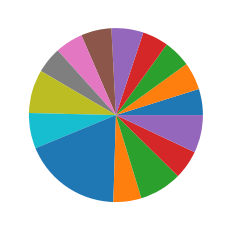

In [12]:
a=pd.Series([24.23,25.53,25.41,24.14,29.62,28.25,25.81,24.39,40.26,32.95,91.36,25.99,39.42,26.71,35.00])
names=['Allied Signal''Bankers Trust''General Mills''ITT Industries''J.P.Morgan & Co.''Lehman Brothers''Marriott''MCI''Merrill Lynch''Microsoft''Morgan Stanley''Sun Microsystems''Travelers''US Airways''Warner-Lambert']
plt.pie(a)